# Understanding Police Shootings and Excessive Use of Force in Seattle

## DATA 512: Human Center Design - Final Project
### Juan Solorio

### Motivation and Goal

Police violence and excess force or police brutality have always been a major area of concern for citizens especially among minority and underrepresented communities. In more recent times, over the last few months we’ve experience the social unrest and rightful outcry through the use of protests and marches from these communities to call out said brutality. 

Taking [mappingpoliceviolence.org]( https://mappingpoliceviolence.org/) as reference, in 2020 alone, police have killed over 800 people across the United States. With Black people making up 28% of those killed by police.

For this project I plan to explore the demographics of police officers involved in shootings and use of force from the city of Seattle to gain a better understanding as to how might this have an effect on the type of response taken by said officers.


### Data

For the project I will be using the data provided by the [City of Seattle Open Data Program]( https://data.seattle.gov/browse?category=Public+Safety&provenance=official&page=2). Primarily I will be using three datasets, one for [SPD Officer Involved Shooting]( https://data.seattle.gov/Public-Safety/SPD-Officer-Involved-Shooting-OIS-Data/mg5r-efcm), one for [Police Use of Force]( https://data.seattle.gov/Public-Safety/Use-Of-Force/ppi5-g2bj), and one for [Seattle PD Officers respoding to Crisis Calls]( https://data.seattle.gov/Public-Safety/Crisis-Data/i2q9-thny). 

These datasets contain demographic information on Police Officers involved in the offence as well as that of the civilian victim. The data also contains geographical and temporal information which could give better insights as to how these events are affected by location or time.


### Research Questions 

The project will focus to answer the following:
1. Are certain demographics of police officers more likely to be involved in shootings?
    - are there certain pairing of police-to-victim demographics that appear more in the data?
2. Is there a precinct (geographical location) that shows more propencity to using force?
3. Is there a relation between the age of an officer or years of experience and their response to a crisis?

### Methodology

Data has been downloaded from [Seattle Open Data API]( https://data.seattle.gov/) on November 14 2020 and hense that is as far as it will be evaluated. This data will be located in the [data]( https://github.com/JUAN-SOLORIO/data-512/tree/main/data-512-final/data) directory for this repository.

I will be using pandas and numpy to perform data cleaning and preprocessing of the data. In order to answers the research questions a combination of pandas tables, data visualizations, and statistical methods (possibly t-tests) will be used.

### Related Work

While there is plenty of research on police brutality and shootings from academic and journalist sources, the research was primarily inspired by the work of [Samuel Sinyangwe]( https://samswey.carto.com/me?utm_source=Footer_Link&utm_medium=referral&utm_campaign=Embed_v1&utm_content=samswey). He is part of a group of data scientist working towards social and racial progress known as *We the Protestors*, who use digital and data analisys tools to bring awareness to issues such as police violence.

Some of this work can be seen in the [mappingpoliceviolence.org]( https://mappingpoliceviolence.org/) website, where we are able to get update information about polive related violance and shootings across the United States.


### Unknowns and dependencies

At the moment I dont have major concerns over the completion of the project except for the posibility that I would like to explore an extra dataset about [Housing and Rental values (Zillow)](https://www.zillow.com/research/data/) and see how these reflect on the Police data.

## 1. Data Cleaning

### 1.1 Loading Data

The data is avaiable in the [Data](https://github.com/JUAN-SOLORIO/data-512/tree/main/data-512-final/data) directory for this repository, however if you would like to download it or look at more updated values you can find it at the [Seattle Open Data API]( https://data.seattle.gov/).

For now we will use the data updated up to November 14 2020 in our repository. 

Let's get some python libraries that might come in handy in our project loaded to the notebook. Primarily we'll be using the libraries [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), and [matplotlib](https://matplotlib.org/) for data cleanup and visualisations to answer our questions.

We might also require to perform some statistical test so it will be handy to load the [statsmodels](https://www.statsmodels.org/stable/index.html) and [scipy](https://docs.scipy.org/doc/scipy/reference/index.html) libraries, and the [seaborn](https://seaborn.pydata.org/) in case want to try different visualizations styles.

We'll read in the data for the 3 main files for **Shooting, Use of Force,** and **Crisis Response** into their respective pandas dataframes.

In [2]:
# downloading data
import os
from urllib.request import urlretrieve
import time


# data manipulation and EAD
import numpy as np
import pandas as pd

# statistics and analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency , chisquare

# visulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Data download URLs
SHOOTING_API = 'https://data.seattle.gov/resource/mg5r-efcm.json'
FORCE_USE_API = 'https://data.seattle.gov/resource/ppi5-g2bj.json'
CRISIS_API = 'https://data.seattle.gov/resource/i2q9-thny.json'

urls = {SHOOTING_API :'spd_officer_shooting',
        FORCE_USE_API:'spd_use_of_force',
        CRISIS_API : 'spd_crisis_data'}

timestr = time.strftime("%Y%m%d")


def download_json_to_csv_data(url, file_name):
    """
        Downloads the data from data.Seattle.gov and places it into "data" folder
    """
    if not os.path.exists('data'):
        os.makedirs('data')
        
    if not os.path.exists('data/'+file_name+timestr+'.csv'):
        data = pd.read_json(url)
        
    return data.to_csv(file_name)

for url, file in urls.items():
    download_json_to_csv_data(url,'data/'+file+timestr+'.csv')


# load data to dataframes
shooting_raw_data = pd.read_csv('data/spd_officer_shooting_20201114.csv')
useforce_raw_data = pd.read_csv('data/spd_use_of_force_20201114.csv')
crisis_data_raw = pd.read_csv('data/spd_crisis_data_20201114.csv')

### 1.2 Data Cleaning
Now let's do a quick inspection at the dataframes loaded to the notebook.

In [5]:
shooting_raw_data.shape

(156, 25)

In [4]:
shooting_raw_data.head(3)

,FRB #,Incident Number,Date / Time,Blurred Address,Longitude,Latitude,City,State,Rank,Officer Gender,...,Subject Race,Subject DOB,Subject Age,Subject Weapon,Type of Weapon,Fatal,On-duty,Disposition,Officer Disciplined?,Summary
0,FRB 05-01,20050000118193,03/21/2005 06:28:00 PM,65XX BLOCK OF RAINIER AV S,-122.273741,47.543815,Seattle,WA,Officer,Male,...,Asian,1975-11-03T00:00:00.000,29,Yes,Knife,Yes,Yes,Missing,Missing,"On March 21st, 2005, at approximately 5:20 P.M..."
1,FRB 05-03,20050000174022,04/29/2005 03:30:00 AM,65XX BLOCK OF 1 AV S,-122.334513,47.544177,Seattle,WA,Officer,Male,...,White,1969-08-02T00:00:00.000,36,No,NaN,Yes,Yes,Justified,No,"On April 29th, 2005, at approximately 3:35 A.M..."
2,FRB 05-04,20050000256303,06/20/2005 11:30:00 AM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,White,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M..."


In [6]:
useforce_raw_data.shape

(11818, 11)

In [7]:
useforce_raw_data.head(3)

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,2014UOF-0001-1377-203,251,Level 1 - Use of Force,06/07/2014 12:09:00 AM,East,CHARLIE,C2,1594,203,Black or African American,Male
1,2014UOF-0002-1098-166,218,Level 1 - Use of Force,05/30/2014 02:06:00 PM,East,GEORGE,G1,1673,166,White,Male
2,2014UOF-0003-1031-125,178,Level 1 - Use of Force,05/23/2014 05:24:00 PM,West,KING,K3,1690,125,Asian,Female


In [8]:
crisis_data_raw.shape

(78137, 25)

In [9]:
crisis_data_raw.head(3)

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,64522,2015-07-19T00:00:00,02:21:00,01/01/1900 12:00:00 AM,-,-,-,Mobile Crisis Team,N,N,...,White,1985-12-30T00:00:00,1,N,NaN,NaN,NaN,-,-,-
1,154284,2016-04-29T00:00:00,14:39:00,01/01/1900 12:00:00 AM,-,-,-,Crisis Clinic,N,N,...,White,1985-09-27T00:00:00,7,Y,NaN,NaN,NaN,-,-,-
2,78352,1900-01-01T00:00:00,00:00:00,09/01/2015 03:25:09 PM,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Voluntary Committal,N,N,...,White,1982-12-31T00:00:00,-1,N,NaN,NaN,NaN,North,UNION,U2


Ok interesting, we see that according to the data, there were 156 reported officer involved shooting insidents, nearly 12K reported incidents of officers use of force, and over 78K Crisis calls made. 

Let's also take a look at the columns for each dataframe, given 2 of the displays get truncated in order to figure out what data we will keep in our data cleaning process. 


In [83]:
shooting_raw_data.columns

Index(['FRB #', 'Incident Number', 'Date / Time', 'Blurred Address',
       'Longitude', 'Latitude', 'City', 'State', 'Rank', 'Officer Gender',
       'Officer Race', 'Years of SPD Service', 'Officer Injured',
       'Number of Rounds', 'Subject Gender', 'Subject Race', 'Subject DOB',
       'Subject Age', 'Subject Weapon', 'Type of Weapon', 'Fatal', 'On-duty',
       'Disposition', 'Officer Disciplined?', 'Summary'],
      dtype='object')

In [56]:
crisis_data_raw.columns

Index(['Template ID', 'Reported Date', 'Reported Time', 'Occurred Date / Time',
       'Call Type', 'Initial Call Type', 'Final Call Type', 'Disposition',
       'Use of Force Indicator', 'Subject Veteran Indicator',
       'CIT Officer Requested', 'CIT Officer Dispatched',
       'CIT Officer Arrived', 'Officer ID', 'Officer Gender', 'Officer Race',
       'Officer Year of Birth', 'Officer Years of Experience',
       'CIT Certified Indicator', 'Officer Bureau Desc',
       'Officer Precinct Desc', 'Officer Squad Desc', 'Precinct', 'Sector',
       'Beat'],
      dtype='object')

In [59]:
useforce_raw_data.columns

Index(['ID', 'Incident_Num', 'Incident_Type', 'Occured_date_time', 'Precinct',
       'Sector', 'Beat', 'Officer_ID', 'Subject_ID', 'Subject_Race',
       'Subject_Gender'],
      dtype='object')

We want to again focus on answering our main research questions for *shooting demographics*, *use of force by preceint*, and *effects of age or years as officer in crisis response*.

For the Shooting data, we will keep **'Incident Number','Longitude', 'Latitude', 'Rank', 'Officer Gender', 'Officer Race', 'Years of SPD Service', 'Officer Injured','Number of Rounds', 'Subject Gender', 'Subject Race', 'Subject DOB','Subject Age', 'Subject Weapon', 'Type of Weapon', 'Fatal', 'On-duty','Disposition', 'Officer Disciplined?'**.

For the Use of Froce we'll keep **'ID', 'Incident_Num', 'Incident_Type', 'Occured_date_time', 'Precinct','Sector', 'Beat', 'Officer_ID', 'Subject_ID', 'Subject_Race','Subject_Gender'**.

For the Crisis Call data, we'll keep **'Template ID', 'Call Type', 'Initial Call Type', 'Final Call Type', 'Disposition','Use of Force Indicator', 'Subject Veteran Indicator','Officer Gender', 'Officer Race', 'Officer Year of Birth', 'Officer Years of Experience', 'Officer Bureau Desc','Officer Precinct Desc', 'Officer Squad Desc', 'Precinct', 'Sector','Beat'**.


In [17]:
shooting_df = shooting_raw_data[['Incident Number','Longitude', 'Latitude', 'Rank', 'Officer Gender', 
                                                      'Officer Race', 'Years of SPD Service', 'Officer Injured',
                                                      'Number of Rounds', 'Subject Gender', 'Subject Race', 'Subject DOB',
                                                      'Subject Age', 'Subject Weapon', 'Type of Weapon', 'Fatal', 'On-duty',
                                                      'Disposition', 'Officer Disciplined?']]

crisis_call_df = crisis_data_raw[['Template ID', 'Call Type', 'Initial Call Type', 'Final Call Type', 
                                                     'Disposition','Use of Force Indicator', 'Subject Veteran Indicator',
                                                     'Officer Gender', 'Officer Race', 'Officer Year of Birth', 
                                                     'Officer Years of Experience', 'Officer Bureau Desc',
                                                     'Officer Precinct Desc', 'Officer Squad Desc', 'Precinct', 
                                                     'Sector','Beat']] 

use_of_force_df = useforce_raw_data[['ID', 'Incident_Num', 'Incident_Type', 'Occured_date_time', 
                                                          'Precinct','Sector', 'Beat', 'Officer_ID', 'Subject_ID', 
                                                          'Subject_Race','Subject_Gender']]


## 2 Research and Analysis

### 2.1 Question 1

To recall, the first question we are interested in answering is:
1. **Are certain demographics of police officers more likely to be involved in shootings?**
    - **are there certain pairing of police-to-victim demographics that appear more in the data?**
 
So let's start by looking at the distributions of both gender of officers involved in shootings as well as the race of the officers.

In [34]:
shooting_Officer_race = shooting_df['Officer Race'].value_counts(normalize=True).reset_index()
shooting_Officer_race.rename(columns={"index": "Officer Race", "Officer Race": "% Police Force"},
                             errors="raise", inplace=True)
shooting_Officer_race

,Officer Race,% Police Force
0,White,0.788462
1,AI/AN,0.044872
2,Black or African American,0.032051
3,Hispanic/Latino,0.025641
4,Black,0.025641
5,Asian/Pacific Islander,0.025641
6,Hispanic or Latino,0.019231
7,Multi-Racial,0.012821
8,Asian,0.006410
9,American Indian/Alaska Native,0.006410


In [38]:
shooting_Officer_gender = shooting_df['Officer Gender'].value_counts(normalize=True).reset_index()
shooting_Officer_gender.rename(columns={"index": "Officer Gender", "Officer Gender": "% Police Force"},
                             errors="raise", inplace=True)
shooting_Officer_gender

,Officer Gender,% Police Force
0,Male,0.884615
1,Female,0.115385


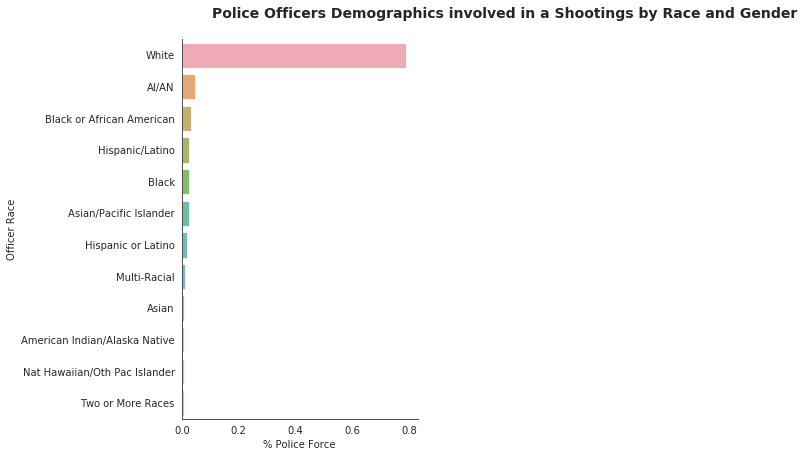

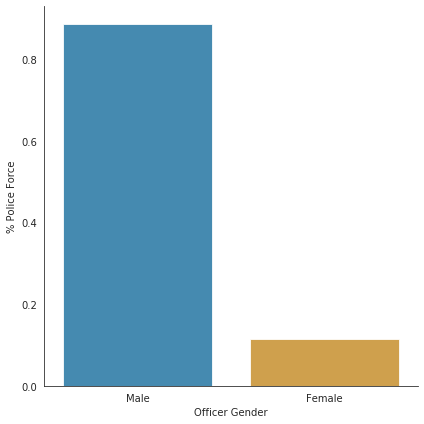

In [84]:
sns.set_style("white")
sns.set_palette("colorblind")
off_race_shooting_viz = sns.catplot(
    data=shooting_Officer_race, kind="bar",
    y="Officer Race", x="% Police Force",
    alpha=.8, height=6
).fig.suptitle('Police Officers Demographics involved in a Shootings by Race and Gender', 
               size=14, y=1.05, fontweight ="bold", ha='left')

off_gender_shooting_viz = sns.catplot(
    data=shooting_Officer_gender, kind="bar",
    x="Officer Gender", y="% Police Force",
    alpha=.8, height=6
)

off_race_shooting_viz 
off_gender_shooting_viz


Ok we definitely see a much higher concentration of Police Officers that are Male and White, where 88% of officers are males and about 79% are White. Definitely something to be concerned about in any line of work if we have such underrepresentation of minority groups. That said, this might be simply explained by the actual distribution of Seattle's population. We can get population statistics from [Washington's Government data](https://www.ofm.wa.gov/washington-data-research/population-demographics/population-estimates/estimates-april-1-population-age-sex-race-and-hispanic-origin). 

To simplify the analysis, given that police force is broken down by precints and there is no easily available population data for that, we will be using King's county population demographi statistics from the Government data. From the [Race and Hispanic](https://www.ofm.wa.gov/sites/default/files/public/dataresearch/pop/asr/race/ofm_pop_race_2010_and_2019.xlsx) file (also available in the Data directory), we get the following demographics distribution for King County:  

In [64]:
# creating dataframe with King county demographic data
race_labels = ['White','Black or African American','Native American',
               'Asian', 'Nat Hawaiian/Oth Pac Islander','Not Specified','Hispanic']
dem_dist = ['0.586896195','0.066173472','0.006084984','0.182333917',
            '0.008524458','0.047277546','0.102709428']
kc_pop_dict = {'Race':race_labels, '% Population':dem_dist}
kc_pop_dem_df = pd.DataFrame(kc_pop_dict)

kc_pop_dem_df

,Race,% Population
0,White,0.586896195
1,Black or African American,0.066173472
2,Native American,0.006084984
3,Asian,0.182333917
4,Nat Hawaiian/Oth Pac Islander,0.008524458
5,Not Specified,0.047277546
6,Hispanic,0.102709428


In [69]:
# creating King County dataframe for Gender distribution
gender_label = ['Male', 'Female']
gender_dist = ['0.4981698','0.5018302']
kc_gender_dict = {'Gender':gender_label, '% Population':gender_dist}
kc_gender_df = pd.DataFrame(kc_gender_dict)

kc_gender_df

,Gender,% Population
0,Male,0.4981698
1,Female,0.5018302


From the Government projected values for 2019 for demographics distribution of population for King county, we can clearly see (both in the tables above and charts below) that there is a huge underrepresentation for minority groups in *police officers involved in a shooting* for both *race* and *gender* distributions when compared to the county's percentages.

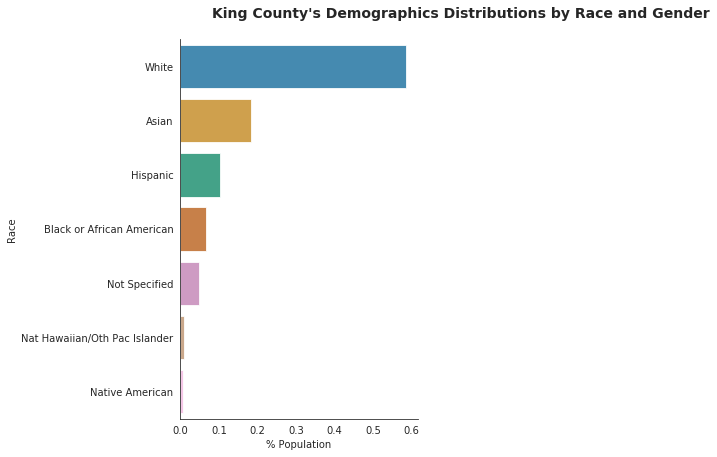

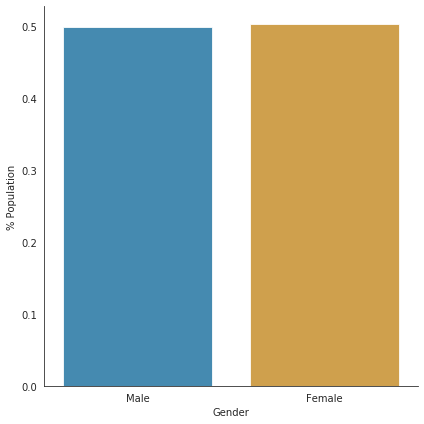

In [85]:
# Viz bar plot from King County population distribution
sns.set_style("white")
sns.set_palette("colorblind")
kc_race_pop_viz = sns.catplot(
    data=kc_pop_dem_df.sort_values(by=['% Population'],ascending=False), kind="bar",
    y="Race", x="% Population",
    alpha=.8, height=6
).fig.suptitle("King County's Demographics Distributions by Race and Gender", 
               size=14, y=1.05, fontweight ="bold", ha='left')

kc_gen_pop_viz = sns.catplot(
    data=kc_gender_df, kind="bar",
    x="Gender", y="% Population",
    alpha=.8, height=6
)

kc_pop_viz
kc_gen_pop_viz

So we can definitely tell that there is some big differences in what would be expected if the Police shooting data distributions match the county's demographic distribution. We see Officers who are **White** make up **79% of Officer shootings** while on making **58% of the county population**. Moreover we also see that **Male Officers** make up **88% of all Officer shootings** but males only make up **49% of the county's population**. 

With that being said let's focus on the police-to-subject demographic pairings, specifically we'll focus on the pairings of **White Police Officer to Minority Race Subjects**, given that white officers make up a majority of police related shootings.

                    Subject Race  % of Subjects Shot by White Officers
0                          White                              0.487805
1      Black or African American                              0.357724
2                          Asian                              0.089431
3                Native American                              0.032520
4                  Not Specified                              0.016260
5                       Hispanic                              0.008130
6  Nat Hawaiian/Oth Pac Islander                              0.008130


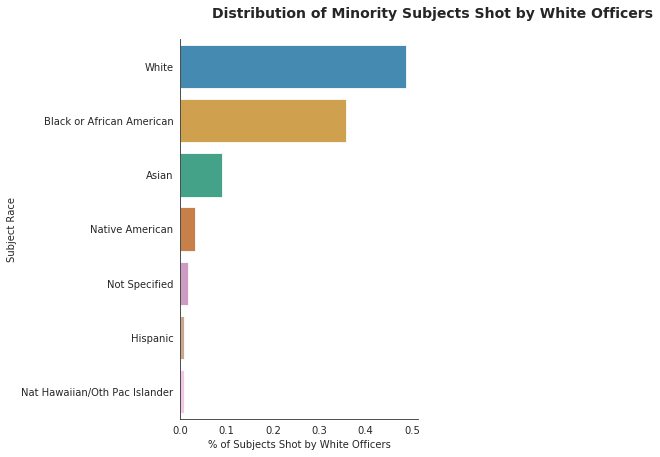

In [87]:
# shooting_df.loc[shooting_df['Officer Race'] != 'White','Subject Race'].value_counts(normalize=True).plot.barh()
non_white_off_shot_racesubject = shooting_df.loc[shooting_df['Officer Race'] != 'White',
                                                 'Subject Race'].value_counts(normalize=True).reset_index()
non_white_off_shot_racesubject.rename(columns={"index": "Subject Race", 
                                               "Subject Race": "% of Subjects Shot by Non-White Officers"},
                                      errors="raise", inplace=True)

white_off_shot_racesubject = shooting_df.loc[shooting_df['Officer Race'] == 'White',
                                                 'Subject Race'].value_counts(normalize=True).reset_index()
white_off_shot_racesubject.rename(columns={"index": "Subject Race", 
                                               "Subject Race": "% of Subjects Shot by White Officers"},
                                      errors="raise", inplace=True)

print(white_off_shot_racesubject)

# Viz bar plot from King County population distribution
sns.set_style("white")
sns.set_palette("colorblind")
wpm_shot_viz = sns.catplot(
    data=white_off_shot_racesubject.sort_values(by=['% of Subjects Shot by White Officers'],ascending=False), kind="bar",
    y="Subject Race", x="% of Subjects Shot by White Officers",
    alpha=.8, height=6
).fig.suptitle("Distribution of Minority Subjects Shot by White Officers", 
               size=14, y=1.05, fontweight ="bold", ha='left')

We see that the distributions for Subject race definitely have change when solely focusing on the shooting committed by White Police officers, where we can see the distribution of White and Black subjects of shootings are closer. We might even be able to say that there is some observable pattern of minority subject shootings by White Officers increased when compared to the overall sample. We will take it one step further and implement a *Chi-Squared goodness-of-fit* statistical test, which will allow us to compare the expected King County demographic proportions to the observed proportions of minority shootings, which will let us know if the values observed are statistically significantly different from the expected.

The Chi-Squared goodness-of-fit test will tell us whether we can reject our **Null Hypothesis ($H_{0}$)** that the observed shooting values are not different from the expected value, for our **Alternative Hypothesis ($H_{a}$)** that they are different from the expected values.

In [110]:
obsrd = white_off_shot_racesubject.sort_values(by=['Subject Race'])['% of Subjects Shot by White Officers']*100

expct = (kc_pop_dem_df.sort_values(by=['Race'])['% Population']).astype(float)*100
stat, p = chisquare(obsrd, f_exp=expct)
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('reject H0') 
else: 
    print('H0 holds true') 

p value is 2.447242467135051e-31
reject H0


We see that from the Chi-Squared test, we can confirm that there is a statistical significance in the difference between the County demographics and the white officer-to-minority subject shooting demographics, implying there is a racial bias in the shootings.

### 2.2 Question 2

The second question we are interested in answering for our police data is:
2. **Is there a precinct (geographical location) that shows more propencity to using force?**

To answer this question we'll move on to the **Use of Force** dataset and focus on the *'Precinct'* indicator. However, getting to a convincing answer is very challenging and more complex than it looks. We will run into the problem of how the population is distributed across the city and as a result how are they distributed across the different precints. As we stated before, it is not easy to find and get data for population distribution by precint, so the following findings for the "most" uses of force by a precint could be misleading. We'll try to figure out a way around this inconvenience with the population distribution for the different precinct. 

Let's address this by looking at each precinct by the number of incidents for the Sectors and Beats (neighborhood zones) to gain  some knowledge about the precinct and possibly deduce some insights about use of force incidents.


In [254]:
pd.DataFrame(useforce_raw_data.loc[useforce_raw_data.Precinct.isin(['East','North','South','Southwest','West']),
                                   'Precinct'].value_counts().reset_index()).rename(columns={'index':'Precinct',
                                                                                            'Precinct':'Use of Force Cases'})

,Precinct,Use of Force Cases
0,West,3200
1,North,2808
2,East,2016
3,South,2007
4,Southwest,653


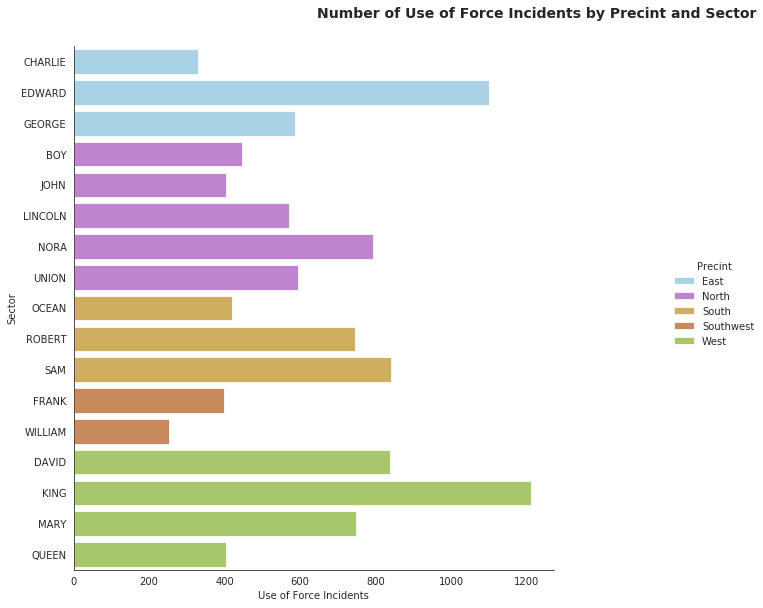

In [146]:
# Calculating the number of incidents for use of force per precint and sector
precint_sector_data = pd.DataFrame(useforce_raw_data.groupby(['Precinct','Sector'])['ID'].count())
precint_sector_data.index = precint_sector_data.index.set_names(['Precint', 'Sector'])
precint_sector_data.reset_index(inplace=True)
precint_sector_data.rename(columns={'ID':'Use of Force Incidents'}, inplace=True)
precint_sector_data

colors = ["skyblue", "mediumorchid","goldenrod","chocolate","yellowgreen"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

uof_viz = sns.catplot(
    data=precint_sector_data, kind="bar",
    y="Sector", x="Use of Force Incidents", hue='Precint',palette=customPalette,
    alpha=.8, height=8, dodge=False
).fig.suptitle("Number of Use of Force Incidents by Precint and Sector", 
               size=14, y=1.05, fontweight ="bold", ha='left')

If we focus on the *Sectors*, we see that the North Precinct has the most number of sectors. We can all see that the West Precinct has the King Sector with the most number of Use of Force incidents.

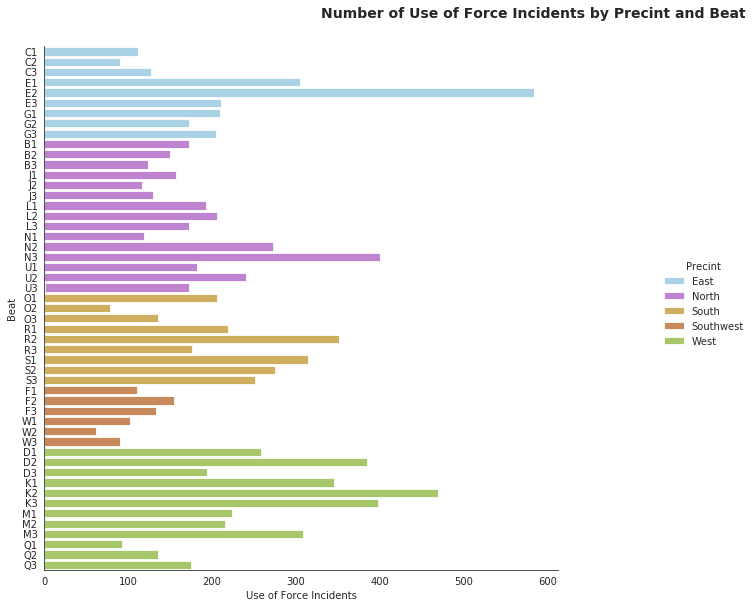

In [144]:
# Calculating the number of incidents for use of force per precint and beat
precint_beat_data = pd.DataFrame(useforce_raw_data.groupby(['Precinct','Beat'])['ID'].count())
precint_beat_data.index = precint_beat_data.index.set_names(['Precint', 'Beat'])
precint_beat_data.reset_index(inplace=True)
precint_beat_data.rename(columns={'ID':'Use of Force Incidents'}, inplace=True)
precint_beat_data

colors = ["skyblue", "mediumorchid","goldenrod","chocolate","yellowgreen"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

uof_beat_viz = sns.catplot(
    data=precint_beat_data.loc[precint_beat_data.Precint.isin(['East','North','South','Southwest','West'])],
    kind="bar", y="Beat", x="Use of Force Incidents", hue='Precint',palette=customPalette,
    alpha=.8, height=8, dodge=False
).fig.suptitle("Number of Use of Force Incidents by Precint and Beat", 
               size=14, y=1.05, fontweight ="bold", ha='left')

Looking at the *Beat* in each precinct, we see that the **East Precinct has the E2 Beat with the most cases** for use of force. However, **West Precinct** has the most Beats with **over 300** incidents.

How about if we instead try to focus on the Type or Level of force used to better understand each precinct? 
If we use the [Seattle Police Department Manual](http://www.seattle.gov/police-manual/title-8---use-of-force/8400---use-of-force-reporting-and-investigation) definitions for the different **Incident Types**. We see that the types are broken down by *Level 1*, *Level 2*, and *Level 3* with increasing level of force. 

*There is no explanation for the 'Level 3 OIS', so that is something I will take as a special case of Level 3, but still with the same severity of use of Force as a regular Level 3*

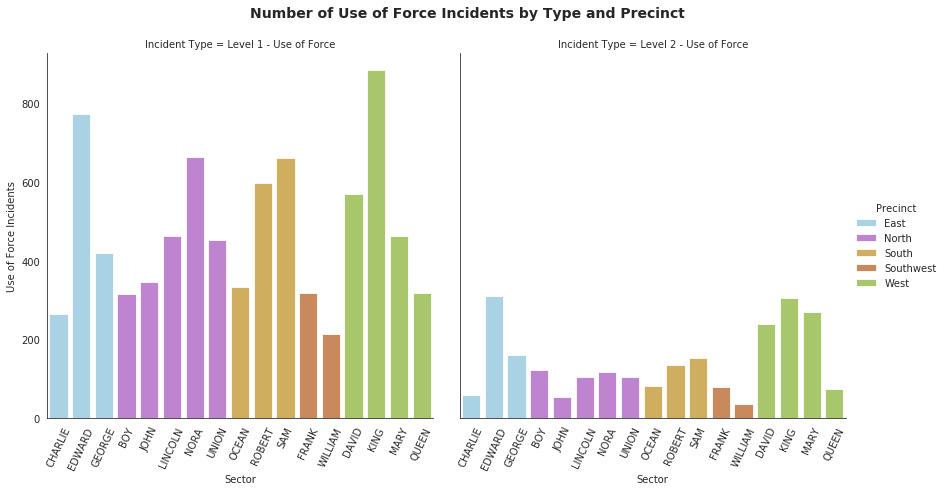

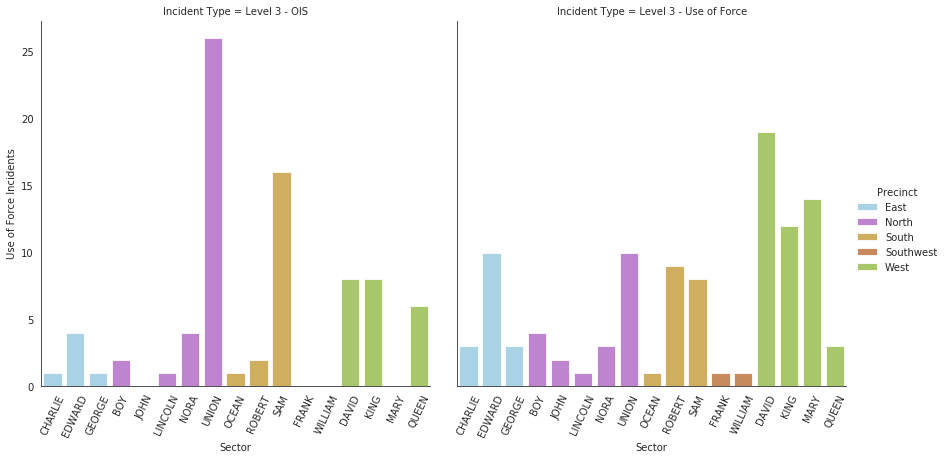

In [180]:
incident_by_sector_count = pd.DataFrame(use_of_force_df.groupby(['Precinct','Sector', 'Incident_Type'])['ID'].count())
incident_by_sector_count.index = incident_by_sector_count.index.set_names(['Precinct','Sector','Incident Type'])
incident_by_sector_count.reset_index(inplace=True)
incident_by_sector_count.rename(columns={'ID':'Use of Force Incidents'}, inplace=True)

incident_by_sector_count
incidenttype_count_precint_viz_12 = sns.catplot(
    data=incident_by_sector_count.loc[incident_by_sector_count['Incident Type'].str.contains('|'.join(['Level 1','Level 2'])),],
    kind="bar", x="Sector", y="Use of Force Incidents", hue='Precinct', col='Incident Type',palette=customPalette,
    alpha=.8, height=6, dodge=False
)
incidenttype_count_precint_viz_12.set_xticklabels(rotation=65)
incidenttype_count_precint_viz_12.fig.suptitle("Number of Use of Force Incidents by Type and Precinct", 
               size=14, y=1.05, fontweight ="bold", ha='center')

incidenttype_count_precint_viz_3 = sns.catplot(
    data=incident_by_sector_count.loc[incident_by_sector['Incident Type'].str.contains('|'.join(['Level 3'])),],
    kind="bar", x="Sector", y="Use of Force Incidents", hue='Precinct', col='Incident Type',palette=customPalette,
    alpha=.8, height=6, dodge=False
)
incidenttype_count_precint_viz_3.set_xticklabels(rotation=65)
# incidenttype_precint_viz_3.fig.suptitle(" of Use of Force Incidents by Type and Precinct", 
#                size=14, y=1.05, fontweight ="bold", ha='center')

incidenttype_count_precint_viz_12
incidenttype_count_precint_viz_3

Looking at the number of incidents by Sectors, we see that over all the West Precinct has the most incidents with Level 3 for it's sectors, while the Union Sector in the North precinct has the most Level 3 incidents.

If we took a look at the percent distribution of incident level for each precinct, we could see a type of propensity a sector or precinct could have for use of force.

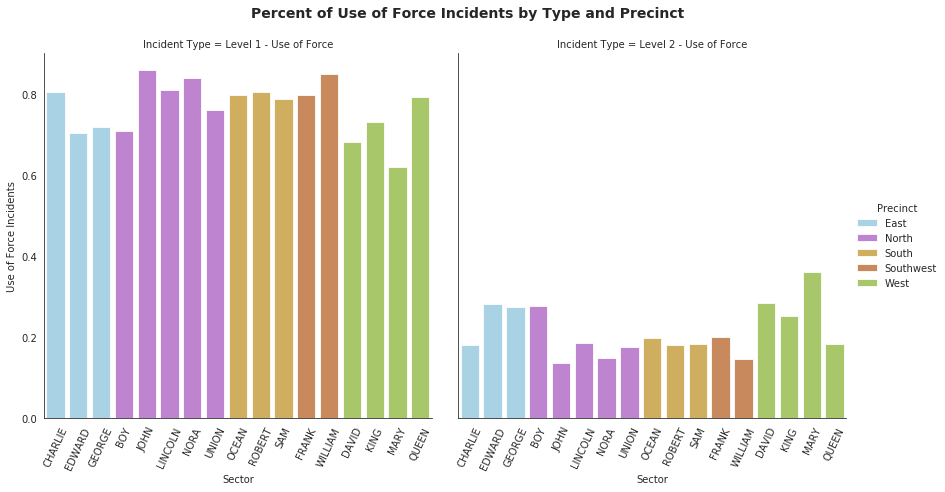

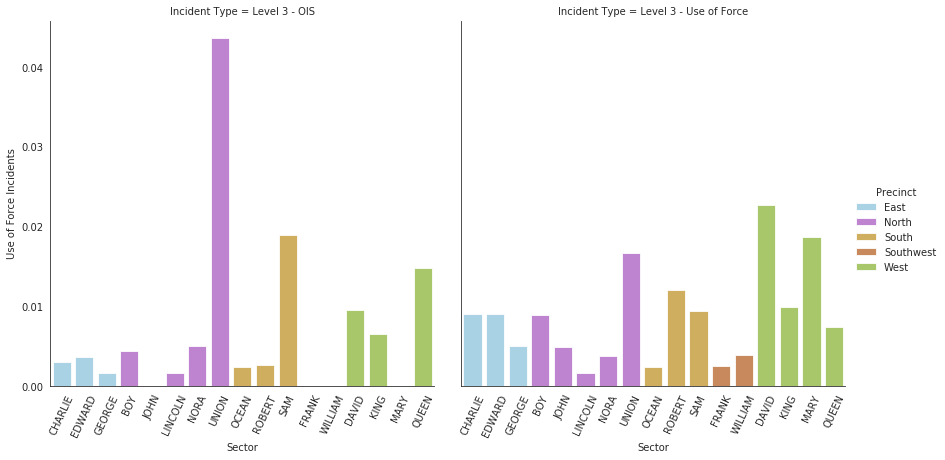

In [178]:
incident_by_sector = pd.DataFrame(use_of_force_df.groupby(['Precinct','Sector', 'Incident_Type'])\
['ID'].count()/use_of_force_df.groupby(['Sector'])['ID'].count())
incident_by_sector.index = incident_by_sector.index.set_names(['Precinct','Sector','Incident Type'])
incident_by_sector.reset_index(inplace=True)
incident_by_sector.rename(columns={'ID':'Use of Force Incidents'}, inplace=True)

incident_by_sector
incidenttype_precint_viz_12 = sns.catplot(
    data=incident_by_sector.loc[incident_by_sector['Incident Type'].str.contains('|'.join(['Level 1','Level 2'])),],
    kind="bar", x="Sector", y="Use of Force Incidents", hue='Precinct', col='Incident Type',palette=customPalette,
    alpha=.8, height=6, dodge=False
)
incidenttype_precint_viz_12.set_xticklabels(rotation=65)
incidenttype_precint_viz_12.fig.suptitle("Percent of Use of Force Incidents by Type and Precinct", 
               size=14, y=1.05, fontweight ="bold", ha='center')

incidenttype_precint_viz_3 = sns.catplot(
    data=incident_by_sector.loc[incident_by_sector['Incident Type'].str.contains('|'.join(['Level 3'])),],
    kind="bar", x="Sector", y="Use of Force Incidents", hue='Precinct', col='Incident Type',palette=customPalette,
    alpha=.8, height=6, dodge=False
)
incidenttype_precint_viz_3.set_xticklabels(rotation=65)
# incidenttype_precint_viz_3.fig.suptitle("Percent of Use of Force Incidents by Type and Precinct", 
#                size=14, y=1.05, fontweight ="bold", ha='center')

incidenttype_precint_viz_12
incidenttype_precint_viz_3

Overall, our findings from looking just at the raw number count of incidents match what the percentage breakdown shows. However, we can see that most precints tend to experience 'Level 1' types of incidents (between 60% and 80% of cases). Once again we see the West precinct to have the highest propensity for 'Level 3' incidents.

In [88]:
crisis_data_raw['Use of Force Indicator'].value_counts()

N    76763
Y     1374
Name: Use of Force Indicator, dtype: int64

In [209]:
Y = age_incidents['Number of Use of Force Incidents']
X = age_incidents['Officer Years of Experience']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [255]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Number of Use of Force Incidents   R-squared:                       0.371
Model:                                          OLS   Adj. R-squared:                  0.357
Method:                               Least Squares   F-statistic:                     26.56
Date:                              Thu, 10 Dec 2020   Prob (F-statistic):           5.51e-06
Time:                                      15:41:52   Log-Likelihood:                -236.06
No. Observations:                                47   AIC:                             476.1
Df Residuals:                                    45   BIC:                             479.8
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          66.6547      9.094      7.329      0.000      48.338      84.972
Officer Years of Experience    -1.4596      0.283     -5.153      0.000      -2.030      -0.889
==============================================================================
Omnibus:                       33.627   Durbin-Watson:                   0.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.190
Skew:                           2.076   Prob(JB):                     7.76e-17
Kurtosis:                       7.543   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.05, "Linear Regression of Officer's Experience who Used Force in a Crisis Call")

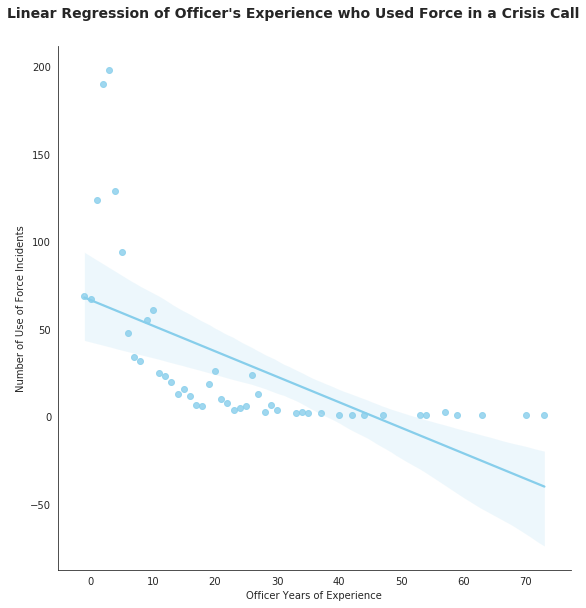

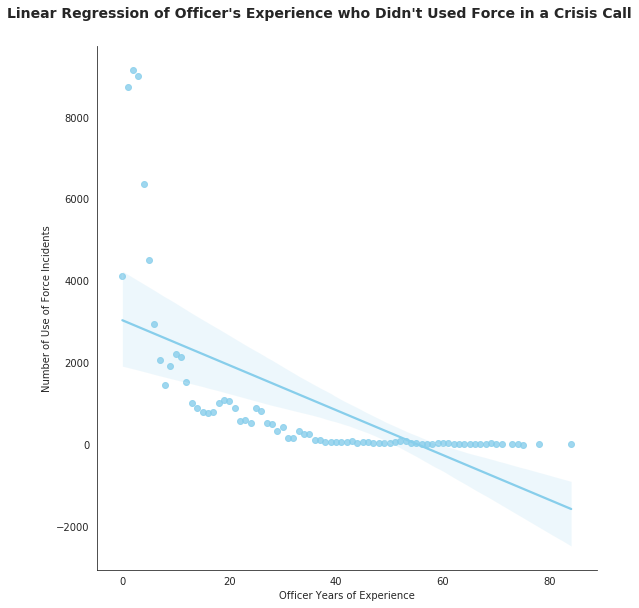

In [252]:
cc_usedforce_viz = sns.lmplot(x='Officer Years of Experience',y='Number of Use of Force Incidents', 
           data=age_y_incidents,height=8).fig.suptitle("Linear Regression of Officer's Experience who Used Force in a Crisis Call", 
               size=14, y=1.05, fontweight ="bold", ha='center')
cc_noforce_viz = sns.lmplot(x='Officer Years of Experience',y='Number of Use of Force Incidents', 
           data=age_n_incidents,height=8).fig.suptitle("Linear Regression of Officer's Experience who Didn't Used Force in a Crisis Call", 
               size=14, y=1.05, fontweight ="bold", ha='center')

cc_noforce_viz
cc_usedforce_viz

In [226]:
age_y_incidents = pd.DataFrame(crisis_data_raw.loc[crisis_data_raw['Use of Force Indicator'] == 'Y',
                                 'Officer Years of Experience'].value_counts().reset_index()).rename(
    columns={'index':'Officer Years of Experience',
             'Officer Years of Experience':'Number of Use of Force Incidents'})
age_n_incidents = pd.DataFrame(crisis_data_raw.loc[crisis_data_raw['Use of Force Indicator'] == 'N',
                                 'Officer Years of Experience'].value_counts().reset_index()).rename(
    columns={'index':'Officer Years of Experience',
             'Officer Years of Experience':'Number of Use of Force Incidents'})
age_n_incidents = age_n_incidents.loc[age_n_incidents['Officer Years of Experience'] >= 0]

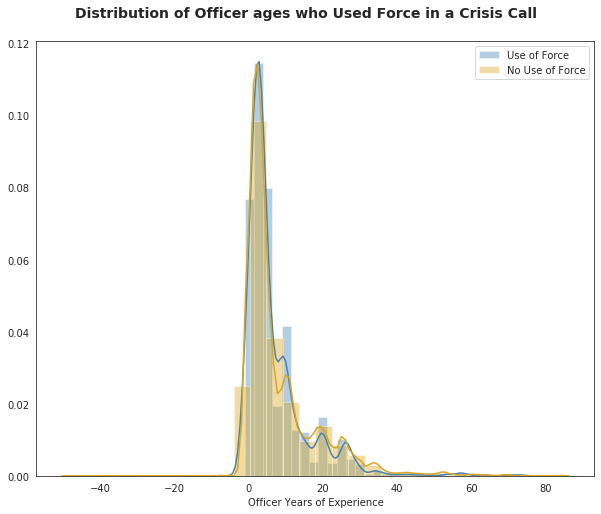

In [246]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(crisis_data_raw.loc[crisis_data_raw['Use of Force Indicator'] == 'Y', 'Officer Years of Experience'],
             bins=30, color='steelblue', label='Use of Force')
sns.distplot(crisis_data_raw.loc[crisis_data_raw['Use of Force Indicator'] == 'N', 'Officer Years of Experience'],
             bins=30, color='goldenrod', label="No Use of Force")
fig.suptitle("Distribution of Officer ages who Used Force in a Crisis Call", 
               size=14, y=.94, fontweight ="bold", ha='center')
plt.legend()

In [ ]:
# creating visual for officers who did not use forse
cc_noforce_viz = sns.lmplot(x='Officer Years of Experience',y='Number of Use of Force Incidents', 
           data=exp_n_incidents,height=8)

# saving figure
cc_noforce_viz.savefig('Figures/Linear_model_no_use_force.png')

# display figure
cc_noforce_viz.fig.suptitle("Linear Regression of Officer's Years of Experience who Didn't Used Force in a Crisis Call", 
               size=14, y=1.05, fontweight ="bold", ha='center')

In [109]:
crisis_data_raw['Initial Call Type'].value_counts()

SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS      13941
PERSON IN BEHAVIORAL/EMOTIONAL CRISIS             13466
DISTURBANCE, MISCELLANEOUS/OTHER                   6983
-                                                  6754
SUSPICIOUS PERSON, VEHICLE OR INCIDENT             2540
                                                  ...  
ILLEGAL DUMPING                                       1
WARRANT - SEARCH. EXECUTED, SECURED                   1
TRU - MVC - HIT AND RUN                               1
KNOWN KIDNAPPNG                                       1
HZMAT - HAZ MATERIALS, LEAKS, SPILLS, OR FOUND        1
Name: Initial Call Type, Length: 169, dtype: int64

In [110]:
crisis_data_raw.groupby(['Use of Force Indicator','Initial Call Type'])['Template ID'].count()

Use of Force Indicator  Initial Call Type                             
N                       -                                                 6716
                        -ASSIGNED DUTY - FOOT BEAT (FROM ASSIGNED CAR)       2
                        -ASSIGNED DUTY - OTHER ESCORT                        1
                        -ASSIGNED DUTY - REPORTS                             2
                        ABDUCTION - IP/JO - UNK KIDNAPPING                   2
                                                                          ... 
Y                       UNKNOWN - COMPLAINT OF UNKNOWN NATURE               18
                        WARRANT - FELONY PICKUP                              3
                        WARRANT - MISD WARRANT PICKUP                        2
                        WEAPN - GUN,DEADLY WPN (NO THRTS/ASLT/DIST)          7
                        WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)      47
Name: Template ID, Length: 251, dtype: int64